In [27]:
import os
from pathlib import Path

current_folder = globals()['_dh'][0]
parent = Path(current_folder).parent
os.chdir(parent)
print(os.getcwd())

/home/josalhor/Desktop/clothes-extractor


In [28]:
import src.dataset as dataset
import importlib
importlib.reload(dataset)
from src.config import Config

In [29]:
from src.dataset import ClothesDataLoader, ClothesDataset
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [30]:
!pwd

/home/josalhor/Desktop/clothes-extractor


In [31]:
cfg = Config()
cfg.dataset_dir = "./datasets/zalando-hd-resized"
cfg.dataset_mode = "train"
cfg.batch_size = 1
cfg.load_height = 1024
cfg.load_width = 768

clothes_dataset = ClothesDataset(cfg, cfg.dataset_mode)
clothes_loader = ClothesDataLoader(dataset=clothes_dataset, batch_size=cfg.batch_size, num_workers=cfg.workers)


Loading image: 04352_00.jpg 3114


In [32]:
result = clothes_dataset[2]
# print('Imaname: ', result["img_name"])
# print('Img shape: ', result["img"].shape)
# print('Cloth shape: ', result["cloth"].shape)
# print('Cloth Mask: ', result["cloth_mask"].shape)
# print('Agnostic Mask: ', result["agnostic_mask"].shape)

# Similarly, we can sample a BATCH from the dataloader by running over its iterator
# iter_ = iter(clothes_loader)
# bimg, blabel = next(iter_)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print('Batch Img shape: ', bimg.shape)
# print('Batch Label shape: ', blabel.shape)
# print(f'The Batched tensors return a collection of {bimg.shape[0]} grayscale images \
# ({bimg.shape[1]} channel, {bimg.shape[2]} height pixels, {bimg.shape[3]} width \
# pixels)')
# print(f'In the case of the labels, we obtain {blabel.shape[0]} batched integers, one per image')

Loading image: 08020_00.jpg 2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Loading image: 02103_00.jpg4717 


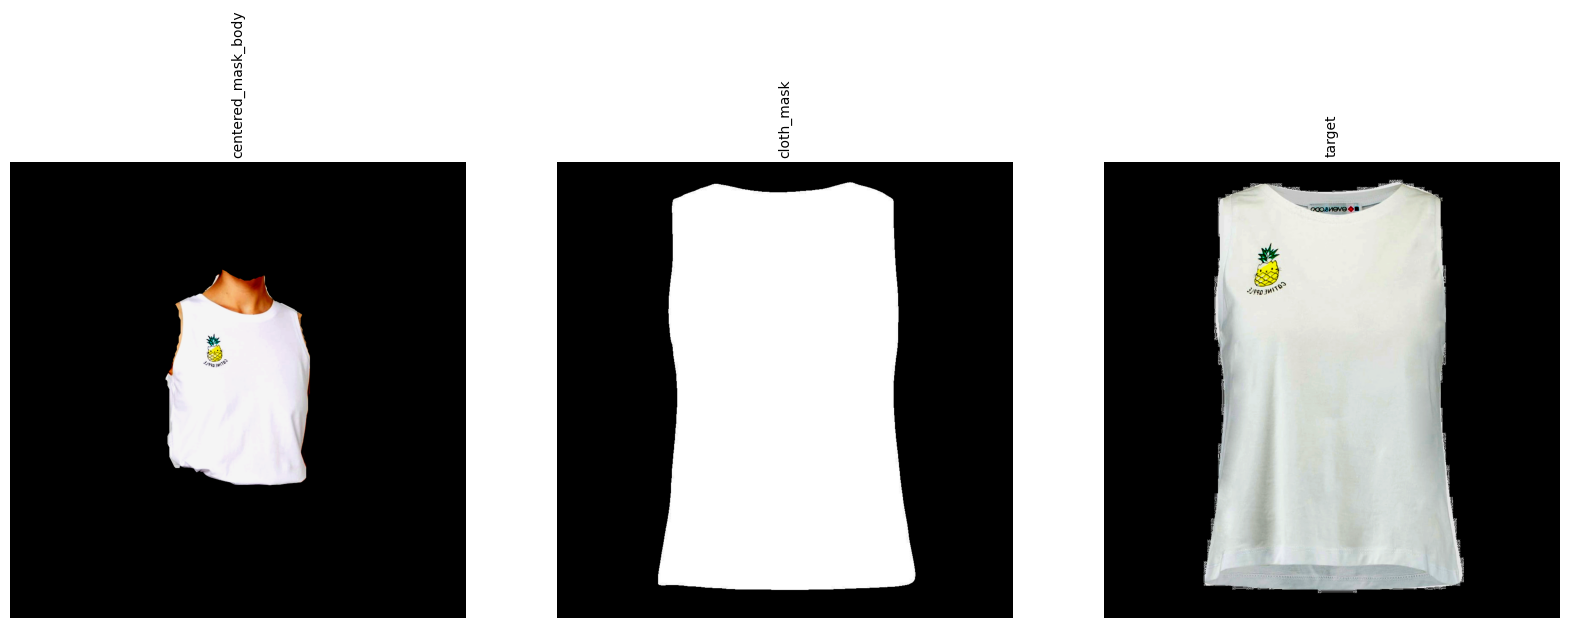

In [33]:
# image_keys = ["img", "cloth", "cloth_mask", "predict", "agnostic_mask", "mask_body_parts", "mask_body", "centered_mask_body", "img_masked"]
image_keys = ["centered_mask_body", "cloth_mask", "target"]
fig, axes = plt.subplots(1, len(image_keys), figsize=(20, 20))

for ax, key in zip(axes, image_keys):
    ax.imshow(result[key].permute(1, 2, 0))
    ax.axis('off')
    ax.set_title(key, rotation=90, fontsize=10)